## Project - 5  Titanic Project
 Problem Statement:
  The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about     multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster.       Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import encodings

In [2]:
os.chdir("C:\github_repo\Files")
df=pd.read_csv("titanic_train.csv")
df

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.head()


,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.sample()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
825,825,826,0,3,"Flynn, Mr. John",male,NaN,0,0,368323,6.95,NaN,Q


In [6]:
df.dtypes

Unnamed: 0       int64
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df.shape

(891, 13)

In [8]:
df.columns

Index(['Unnamed: 0', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df.info

<bound method DataFrame.info of      Unnamed: 0  PassengerId  Survived  Pclass  \
0             0            1         0       3   
1             1            2         1       1   
2             2            3         1       3   
3             3            4         1       1   
4             4            5         0       3   
..          ...          ...       ...     ...   
886         886          887         0       2   
887         887          888         1       1   
888         888          889         0       3   
889         889          890         1       1   
890         890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Pe

DROPPING COLUMN

In [10]:
df = df.drop(["PassengerId","Name","Cabin","Ticket"],axis=1)
df

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,male,22.0,1,0,7.2500,S
1,1,1,1,female,38.0,1,0,71.2833,C
2,2,1,3,female,26.0,0,0,7.9250,S
3,3,1,1,female,35.0,1,0,53.1000,S
4,4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S
887,887,1,1,female,19.0,0,0,30.0000,S
888,888,0,3,female,NaN,1,2,23.4500,S
889,889,1,1,male,26.0,0,0,30.0000,C


In [11]:
df.columns

Index(['Unnamed: 0', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [12]:
df = df.drop(["Unnamed: 0"],axis=1)

## Exploratory Data Analysis(EDA)

<function matplotlib.pyplot.show(close=None, block=None)>

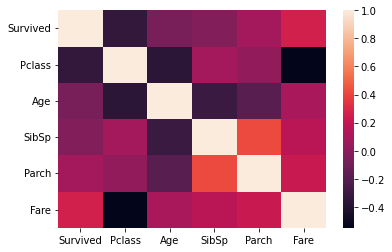

In [13]:
sns.heatmap(df.corr()) #heatmap
plt.show            

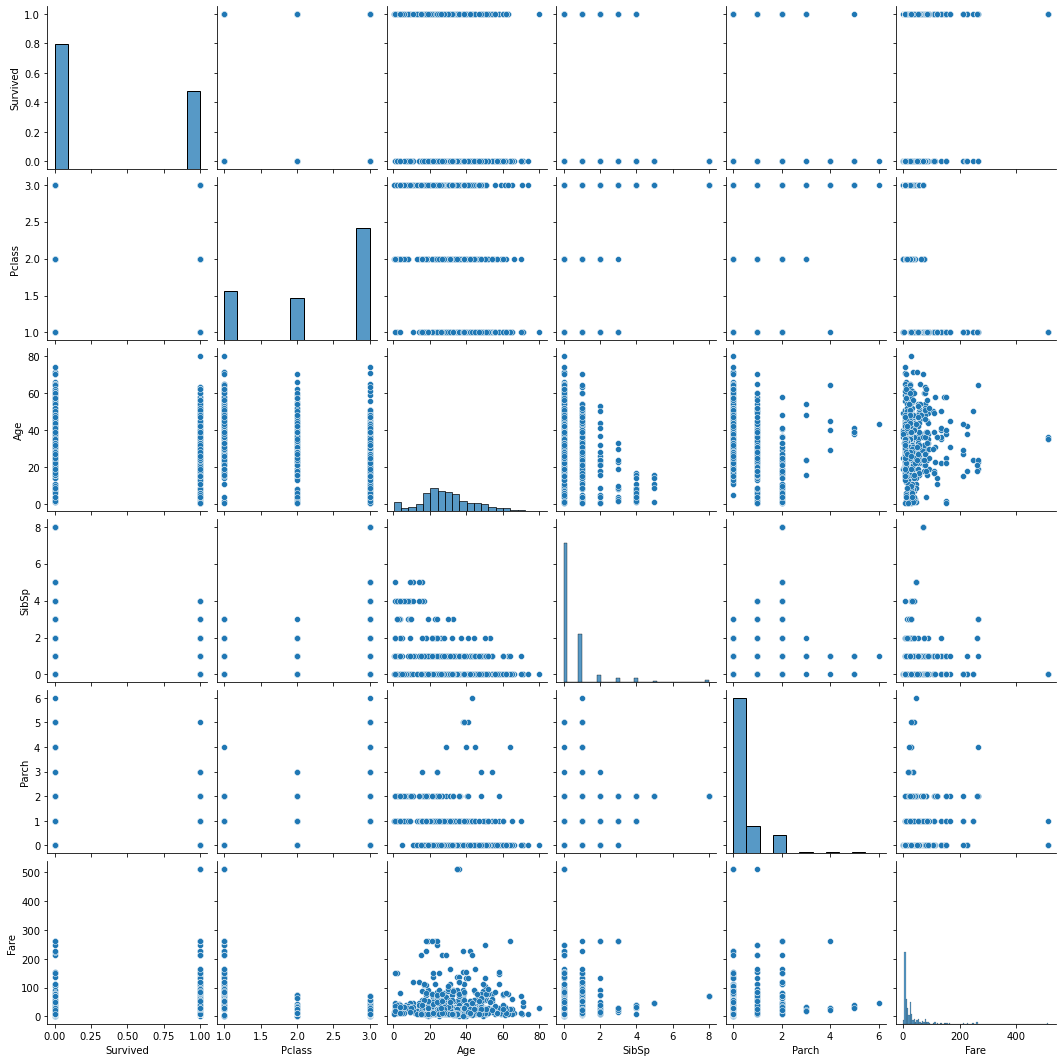

In [14]:
# creating Scatterplot of given dAta set
sns.pairplot(df)

FILLING MISSING VALUES

In [15]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

There are missing values in "Age" and "Embarked" columns
We will use mean method for "Age" and mode option for "Embarked" column.


BOXPLOT

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

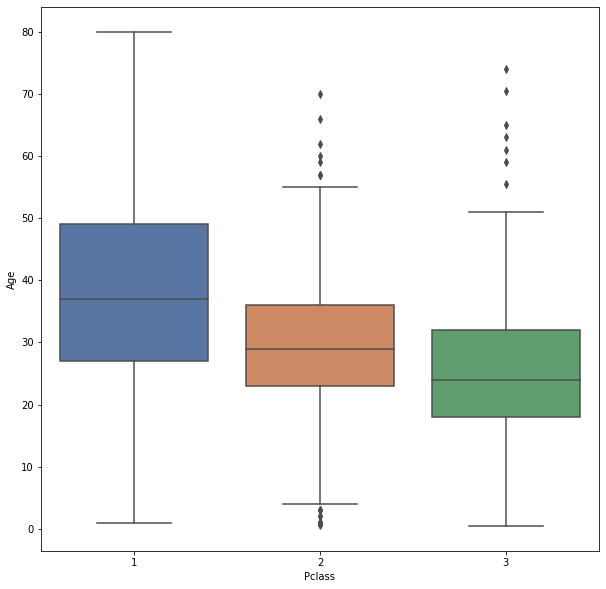

In [16]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Pclass', y='Age', data=df, palette="deep")


IN CLASS 1 ,THE AVERAGE AGE SHOWN IN BLUE BOXPLOT IS AROUND 38 IN CLASS 2 , THE AVERAGE AGE SHOWN IN ORANGE BOXPLOT IS AROUND 29 IN CLASS 2 , THE AVERAGE AGE SHOWN IN GREEN BOXPLOT IS AROUND 24

In [17]:
def fill_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [18]:
#using above function to fill missing values in Age column
df["Age"] = df[["Age","Pclass"]].apply(fill_age, axis=1)

In [19]:
#filling missing values in "Embarked" column using mode
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [20]:
#checking missing values again
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## ENCODING CATEGORIAL DATA

In [21]:
#encoding using get dummies method
df = pd.get_dummies(df)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,24.0,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


## SUMMARY STATISTICS

In [22]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.100079,0.523008,0.381594,32.204208,0.352413,0.647587,0.188552,0.086420,0.725028
std,0.486592,0.836071,13.265936,1.102743,0.806057,49.693429,0.477990,0.477990,0.391372,0.281141,0.446751
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


## CORRELATION

In [23]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.046746,-0.035322,0.081629,0.257307,0.543351,-0.543351,0.168240,0.003650,-0.149683
Pclass,-0.338481,1.000000,-0.411805,0.083081,0.018443,-0.549500,-0.131900,0.131900,-0.243292,0.221009,0.074053
Age,-0.046746,-0.411805,1.000000,-0.243877,-0.171917,0.125033,-0.078573,0.078573,0.041791,-0.082307,0.015186
SibSp,-0.035322,0.083081,-0.243877,1.000000,0.414838,0.159651,0.114631,-0.114631,-0.059528,-0.026354,0.068734
Parch,0.081629,0.018443,-0.171917,0.414838,1.000000,0.216225,0.245489,-0.245489,-0.011069,-0.081228,0.060814
Fare,0.257307,-0.549500,0.125033,0.159651,0.216225,1.000000,0.182333,-0.182333,0.269335,-0.117216,-0.162184
Sex_female,0.543351,-0.131900,-0.078573,0.114631,0.245489,0.182333,1.000000,-1.000000,0.082853,0.074115,-0.119224
Sex_male,-0.543351,0.131900,0.078573,-0.114631,-0.245489,-0.182333,-1.000000,1.000000,-0.082853,-0.074115,0.119224
Embarked_C,0.168240,-0.243292,0.041791,-0.059528,-0.011069,0.269335,0.082853,-0.082853,1.000000,-0.148258,-0.782742
Embarked_Q,0.003650,0.221009,-0.082307,-0.026354,-0.081228,-0.117216,0.074115,-0.074115,-0.148258,1.000000,-0.499421


<AxesSubplot:>

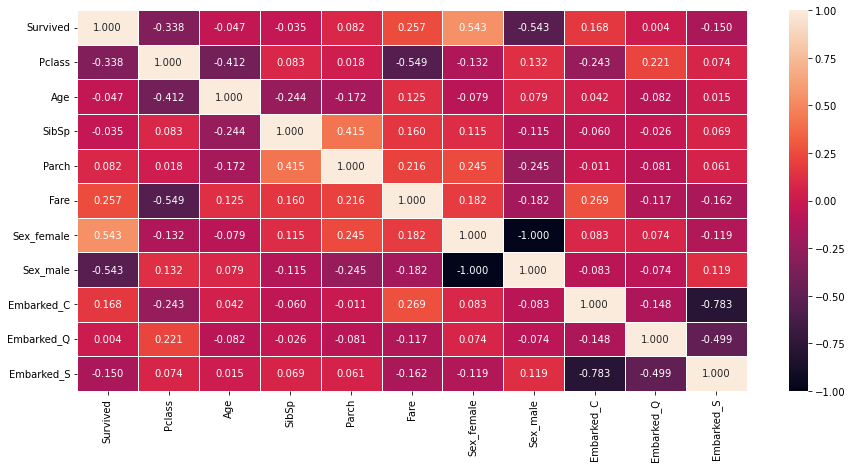

In [24]:
#correlation using heatmap
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, fmt='.3f')

In [25]:
#sorting correlation of all columns with target column
df.corr()['Survived'].sort_values()

Sex_male     -0.543351
Pclass       -0.338481
Embarked_S   -0.149683
Age          -0.046746
SibSp        -0.035322
Embarked_Q    0.003650
Parch         0.081629
Embarked_C    0.168240
Fare          0.257307
Sex_female    0.543351
Survived      1.000000
Name: Survived, dtype: float64

## OUTLIERS

Survived         AxesSubplot(0.125,0.657941;0.168478x0.222059)
Pclass        AxesSubplot(0.327174,0.657941;0.168478x0.222059)
Age           AxesSubplot(0.529348,0.657941;0.168478x0.222059)
SibSp         AxesSubplot(0.731522,0.657941;0.168478x0.222059)
Parch            AxesSubplot(0.125,0.391471;0.168478x0.222059)
Fare          AxesSubplot(0.327174,0.391471;0.168478x0.222059)
Sex_female    AxesSubplot(0.529348,0.391471;0.168478x0.222059)
Sex_male      AxesSubplot(0.731522,0.391471;0.168478x0.222059)
Embarked_C          AxesSubplot(0.125,0.125;0.168478x0.222059)
Embarked_Q       AxesSubplot(0.327174,0.125;0.168478x0.222059)
Embarked_S       AxesSubplot(0.529348,0.125;0.168478x0.222059)
dtype: object

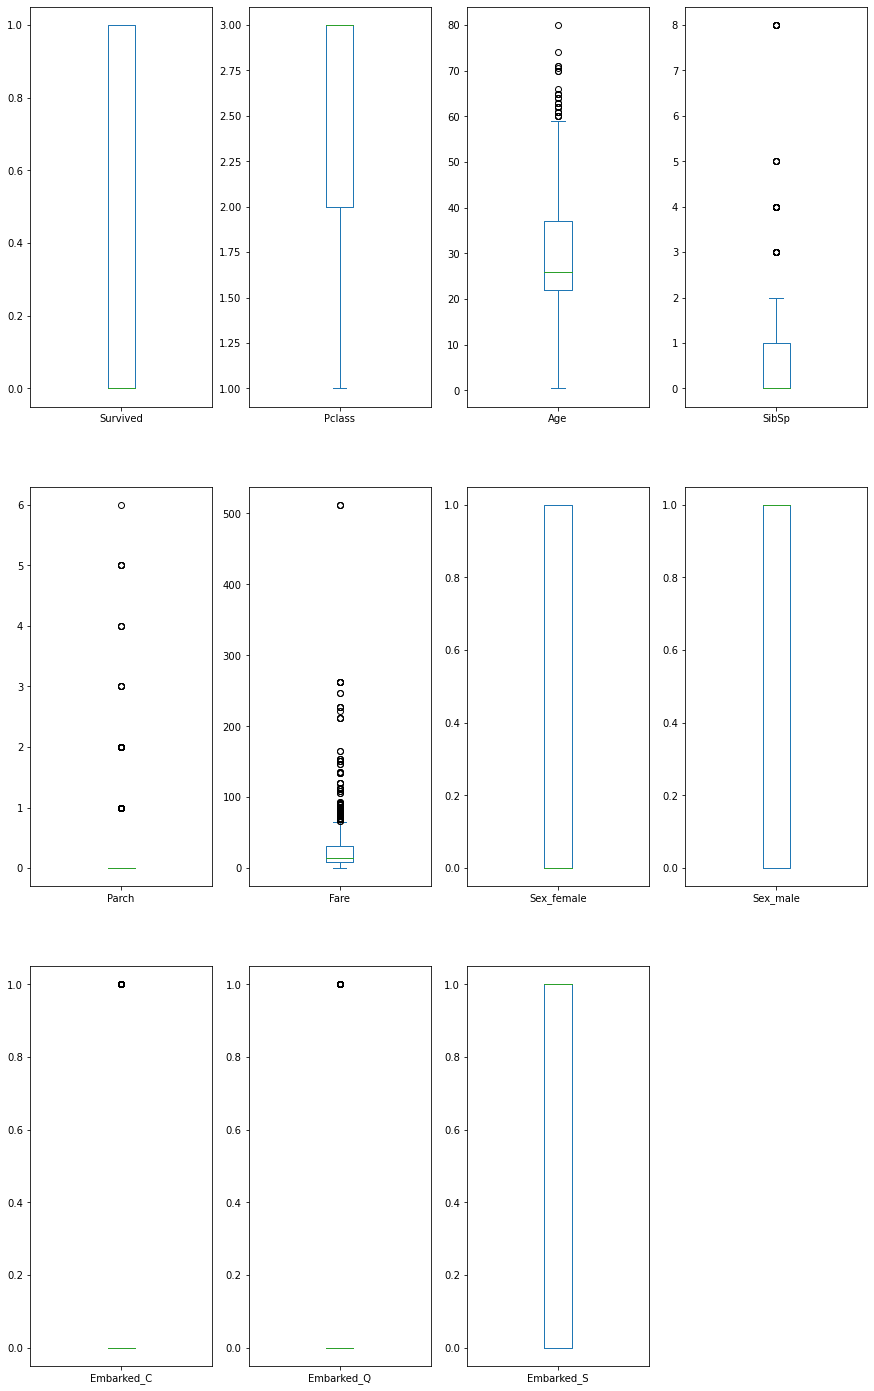

In [26]:
#checking outliers for every column
df.plot(kind='box',subplots=True,layout=(3,4),figsize=(15,25))

## SKEWNESS

C:\Users\poonam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Survived', ylabel='Density'>

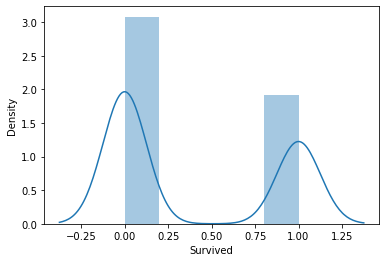

In [27]:
sns.distplot(df['Survived'])

C:\Users\poonam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pclass', ylabel='Density'>

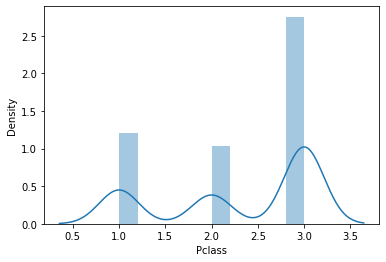

In [28]:
sns.distplot(df['Pclass'])

C:\Users\poonam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

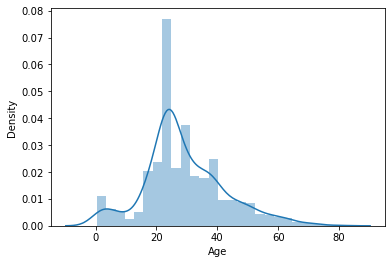

In [29]:
sns.distplot(df['Age'])

C:\Users\poonam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SibSp', ylabel='Density'>

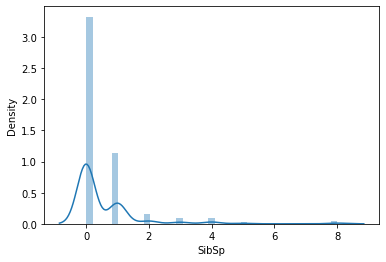

In [30]:
sns.distplot(df['SibSp'])

C:\Users\poonam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Parch', ylabel='Density'>

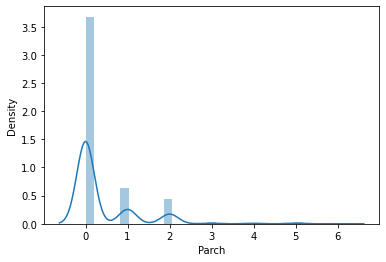

In [31]:
sns.distplot(df['Parch'])

C:\Users\poonam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

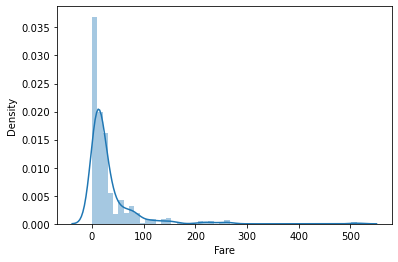

In [32]:
sns.distplot(df['Fare'])

C:\Users\poonam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sex_female', ylabel='Density'>

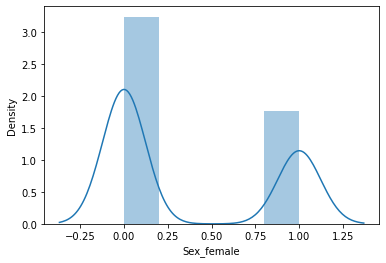

In [33]:
sns.distplot(df['Sex_female'])

C:\Users\poonam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sex_male', ylabel='Density'>

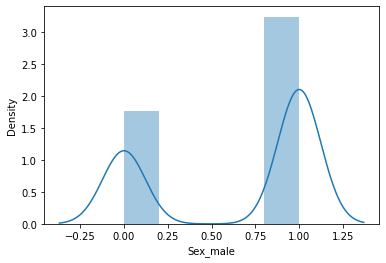

In [34]:
sns.distplot(df['Sex_male'])

C:\Users\poonam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Embarked_C', ylabel='Density'>

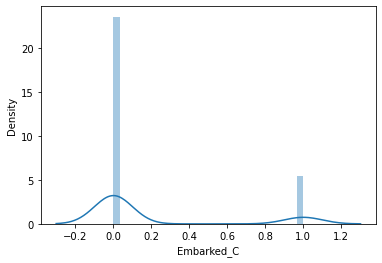

In [35]:
sns.distplot(df['Embarked_C'])

C:\Users\poonam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Embarked_Q', ylabel='Density'>

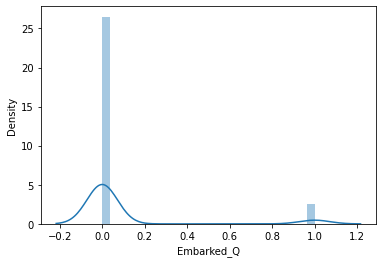

In [36]:
sns.distplot(df['Embarked_Q'])

C:\Users\poonam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Embarked_S', ylabel='Density'>

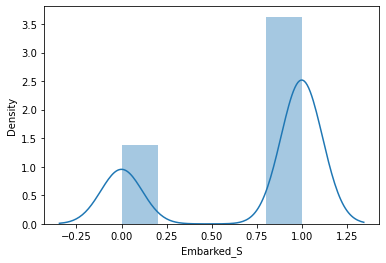

In [37]:
sns.distplot(df['Embarked_S'])

In [38]:
#checking skewness and sorting skewness values
df.skew().sort_values()

Embarked_S   -1.009665
Pclass       -0.630548
Sex_male     -0.618921
Survived      0.478523
Age           0.541066
Sex_female    0.618921
Embarked_C    1.595149
Parch         2.749117
Embarked_Q    2.948778
SibSp         3.695352
Fare          4.787317
dtype: float64

## VARIANCE INFLATION FACTOR

In [39]:
#copying the dataframe
df1=pd.DataFrame(data=df)       
df1

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,24.0,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [40]:
x1=df1.iloc[:,1:]
y1=df1.iloc[:,0]

In [41]:
#getting the size of features
x1.shape

(891, 10)

In [42]:
#getting size of label
y1.shape

(891,)

In [43]:
#printing number of columns
x1.shape[1]

10

In [44]:
# importing required libraries for VIF
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif["variables"]=x1.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return(vif)

In [46]:
calc_vif(x1)

C:\Users\poonam\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF FACTOR
0,Pclass,1.864598
1,Age,1.307141
2,SibSp,1.288794
3,Parch,1.331027
4,Fare,1.651000
5,Sex_female,inf
6,Sex_male,inf
7,Embarked_C,inf
8,Embarked_Q,inf
9,Embarked_S,inf


## SPLITTING DATASET INTO FEATURES AND TARGET

In [47]:
X = df.iloc[:,1:]      
y = df.iloc[:,0]

In [48]:
#checking the features dataset
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,24.0,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [49]:
#checking target column
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## DATA PREPROCESSING

In [50]:
#GETTING ZSCORE
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.789272,0.827377,0.535512,0.432793,0.473674,0.502445,0.737695,0.737695,0.482043,0.307562,0.615838
1,1.266990,1.566107,0.671262,0.432793,0.473674,0.786845,1.355574,1.355574,2.074505,0.307562,1.623803
2,1.266990,0.827377,0.233818,0.474545,0.473674,0.488854,1.355574,1.355574,0.482043,0.307562,0.615838
3,1.266990,1.566107,0.444992,0.432793,0.473674,0.420730,1.355574,1.355574,0.482043,0.307562,0.615838
4,0.789272,0.827377,0.444992,0.474545,0.473674,0.486337,0.737695,0.737695,0.482043,0.307562,0.615838
...,...,...,...,...,...,...,...,...,...,...,...
886,0.789272,0.369365,0.158395,0.474545,0.473674,0.386671,0.737695,0.737695,0.482043,0.307562,0.615838
887,1.266990,1.566107,0.761782,0.474545,0.473674,0.044381,1.355574,1.355574,0.482043,0.307562,0.615838
888,0.789272,0.827377,0.384665,0.432793,2.008933,0.176263,1.355574,1.355574,0.482043,0.307562,0.615838
889,1.266990,1.566107,0.233818,0.474545,0.473674,0.044381,0.737695,0.737695,2.074505,0.307562,1.623803


In [51]:
#checking for data where zscore is more than given threshold
threshold = 3
print(np.where(z>3))

(array([  5,  13,  16,  16,  22,  25,  27,  28,  32,  44,  46,  47,  50,
        59,  68,  71,  82,  86,  88,  96, 109, 116, 116, 118, 119, 126,
       143, 156, 159, 164, 167, 171, 171, 180, 182, 186, 188, 196, 198,
       201, 208, 214, 233, 241, 245, 258, 260, 261, 264, 266, 274, 278,
       278, 280, 289, 299, 300, 301, 303, 311, 322, 324, 330, 341, 358,
       359, 360, 364, 368, 377, 380, 386, 388, 411, 412, 421, 428, 437,
       438, 438, 459, 468, 480, 493, 501, 502, 510, 517, 525, 527, 541,
       542, 552, 557, 560, 567, 573, 593, 610, 612, 613, 626, 629, 630,
       638, 653, 654, 657, 672, 678, 679, 680, 683, 686, 689, 697, 700,
       703, 716, 718, 727, 730, 736, 737, 742, 745, 749, 767, 768, 774,
       776, 778, 779, 787, 787, 790, 792, 813, 824, 825, 828, 846, 850,
       851, 858, 863, 885, 885, 890], dtype=int64), array([9, 4, 3, 9, 9, 4, 5, 9, 9, 9, 9, 9, 3, 3, 3, 3, 9, 4, 5, 2, 9, 2,
       9, 5, 3, 9, 9, 9, 3, 3, 4, 3, 9, 3, 3, 9, 9, 9, 9, 3, 9, 9, 3, 9,
       9,

In [52]:
len(np.where(z>3)[0])

149

In [53]:
# removing outliers using zscore
df_new=df[(z<3).all(axis=1)]
print("Old Dataframe",df.shape)
print("New Dataframe",df_new.shape)
print("total_dropped_rows",df.shape[0] - df_new.shape[0])

Old Dataframe (891, 11)
New Dataframe (749, 11)
total_dropped_rows 142


In [54]:
#percentage data loss
loss_percent=(891-749)/891*100
print(loss_percent,'%')

15.937149270482603 %


## DATA LOSS PERCENTAGE IS 15% WHICH IS NOT ACCEPTABLE SO WE ARE NOT REMOVING OUTLIERS USING ZSCORE

In [55]:
X.skew()

Pclass       -0.630548
Age           0.541066
SibSp         3.695352
Parch         2.749117
Fare          4.787317
Sex_female    0.618921
Sex_male     -0.618921
Embarked_C    1.595149
Embarked_Q    2.948778
Embarked_S   -1.009665
dtype: float64

In [56]:
X['SibSp'] = np.sqrt(X['SibSp'])
X['SibSp'].skew()

1.436526474694446

In [57]:
X['Parch'] = np.sqrt(X['Parch'])
X['Parch'].skew()

1.5297990732860154

In [58]:
X['Fare'] = np.sqrt(X['Fare'])
X['Fare'].skew()

2.08500441820235

In [59]:
X.skew()

Pclass       -0.630548
Age           0.541066
SibSp         1.436526
Parch         1.529799
Fare          2.085004
Sex_female    0.618921
Sex_male     -0.618921
Embarked_C    1.595149
Embarked_Q    2.948778
Embarked_S   -1.009665
dtype: float64

In [60]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1.0,0.000000,2.692582,0,1,0,0,1
1,1,38.0,1.0,0.000000,8.442944,1,0,1,0,0
2,3,26.0,0.0,0.000000,2.815138,1,0,0,0,1
3,1,35.0,1.0,0.000000,7.286975,1,0,0,0,1
4,3,35.0,0.0,0.000000,2.837252,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0.0,0.000000,3.605551,0,1,0,0,1
887,1,19.0,0.0,0.000000,5.477226,1,0,0,0,1
888,3,24.0,1.0,1.414214,4.842520,1,0,0,0,1
889,1,26.0,0.0,0.000000,5.477226,0,1,1,0,0


C:\Users\poonam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SibSp', ylabel='Density'>

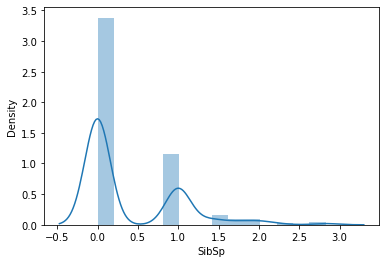

In [61]:
sns.distplot(X['SibSp'])

C:\Users\poonam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Parch', ylabel='Density'>

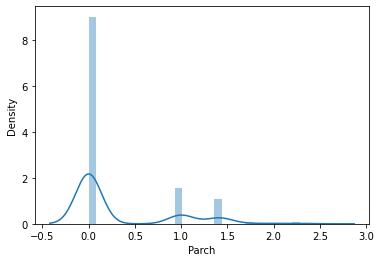

In [62]:
sns.distplot(X['Parch'])

C:\Users\poonam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

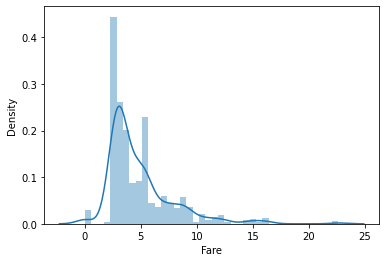

In [63]:
sns.distplot(X['Fare'])

## SKEWNESS HAS BEEN REDUCED IN THREE COLUMNS USING SQUARE ROOT TRANSFORM

## STANDARD SCALING

In [64]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1=sc.fit_transform(X)
x1

array([[ 0.82737724, -0.53551189,  1.00440956, ..., -0.48204268,
        -0.30756234,  0.61583843],
       [-1.56610693,  0.67126212,  1.00440956, ...,  2.0745051 ,
        -0.30756234, -1.62380254],
       [ 0.82737724, -0.23381839, -0.62953745, ..., -0.48204268,
        -0.30756234,  0.61583843],
       ...,
       [ 0.82737724, -0.38466514,  1.00440956, ..., -0.48204268,
        -0.30756234,  0.61583843],
       [-1.56610693, -0.23381839, -0.62953745, ...,  2.0745051 ,
        -0.30756234, -1.62380254],
       [ 0.82737724,  0.21872186, -0.62953745, ..., -0.48204268,
         3.25137334, -1.62380254]])

In [65]:
X.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [66]:
#reassigning scaled values to x
x = pd.DataFrame(x1,columns=X.columns)

In [67]:
x

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.827377,-0.535512,1.004410,-0.539747,-0.733117,-0.737695,0.737695,-0.482043,-0.307562,0.615838
1,-1.566107,0.671262,1.004410,-0.539747,1.219822,1.355574,-1.355574,2.074505,-0.307562,-1.623803
2,0.827377,-0.233818,-0.629537,-0.539747,-0.691495,1.355574,-1.355574,-0.482043,-0.307562,0.615838
3,-1.566107,0.444992,1.004410,-0.539747,0.827232,1.355574,-1.355574,-0.482043,-0.307562,0.615838
4,0.827377,0.444992,-0.629537,-0.539747,-0.683984,-0.737695,0.737695,-0.482043,-0.307562,0.615838
...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,-0.158395,-0.629537,-0.539747,-0.423054,-0.737695,0.737695,-0.482043,-0.307562,0.615838
887,-1.566107,-0.761782,-0.629537,-0.539747,0.212604,1.355574,-1.355574,-0.482043,-0.307562,0.615838
888,0.827377,-0.384665,1.004410,2.061805,-0.002955,1.355574,-1.355574,-0.482043,-0.307562,0.615838
889,-1.566107,-0.233818,-0.629537,-0.539747,0.212604,-0.737695,0.737695,2.074505,-0.307562,-1.623803


In [68]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## THE TARGET COLUMN HAS CATEGORICAL VARIABLE ,SO WE WILL USE LOGISTIC REGRESSION

## MACHINE LEARNING

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [70]:
#BEST RANDOM STATE
maxAccu = 0   # maximum accuracy
maxRS = 0     # best random state value for which max accuracy is achieved

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    print('accuracy', acc, 'random_state', i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('accuracy', maxAccu, 'random_state              ', maxRS)

accuracy 0.7988826815642458 random_state 1
accuracy 0.7988826815642458 random_state               1
accuracy 0.7821229050279329 random_state 2
accuracy 0.7597765363128491 random_state 3
accuracy 0.8268156424581006 random_state 4
accuracy 0.8268156424581006 random_state               4
accuracy 0.8268156424581006 random_state 5
accuracy 0.8603351955307262 random_state 6
accuracy 0.8603351955307262 random_state               6
accuracy 0.7541899441340782 random_state 7
accuracy 0.7653631284916201 random_state 8
accuracy 0.776536312849162 random_state 9
accuracy 0.8212290502793296 random_state 10
accuracy 0.8659217877094972 random_state 11
accuracy 0.8659217877094972 random_state               11
accuracy 0.770949720670391 random_state 12
accuracy 0.8379888268156425 random_state 13
accuracy 0.8044692737430168 random_state 14
accuracy 0.8156424581005587 random_state 15
accuracy 0.7374301675977654 random_state 16
accuracy 0.770949720670391 random_state 17
accuracy 0.8547486033519553 random_

We take random state 11 as is has the maximum accuracy.

## CREATING TEST SPLIT USING ABOVE GOT RANDOM STATE

In [71]:
#importing required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [72]:
# creating a function to run all the classifiers

def classifier(model, x, y):
    x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=11)  
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting y_test
    pred = model.predict(x_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

## LOGISTIC REGRESSION

In [73]:
model = LogisticRegression()
classifier(model, x, y)

Accuracy Score: 86.59217877094973

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90       118
           1       0.82      0.77      0.80        61

    accuracy                           0.87       179
   macro avg       0.85      0.84      0.85       179
weighted avg       0.86      0.87      0.86       179

Cross Validation Score: 79.91337643587973

Accuracy Score - Cross Validation Score is 6.678802335070003


## GAUSSIAN NAIVE BAYES

In [74]:
model = GaussianNB()
classifier(model, x, y)

Accuracy Score: 83.24022346368714

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87       118
           1       0.72      0.82      0.77        61

    accuracy                           0.83       179
   macro avg       0.81      0.83      0.82       179
weighted avg       0.84      0.83      0.83       179

Cross Validation Score: 77.4439771514657

Accuracy Score - Cross Validation Score is 5.796246312221442


## SVC CLASSIFIER

In [75]:
model = SVC(kernel='rbf')
classifier(model, x, y)

Accuracy Score: 88.26815642458101

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.92       118
           1       0.93      0.70      0.80        61

    accuracy                           0.88       179
   macro avg       0.90      0.84      0.86       179
weighted avg       0.89      0.88      0.88       179

Cross Validation Score: 82.26664992781369

Accuracy Score - Cross Validation Score is 6.00150649676732


In [76]:
model = SVC(kernel='linear')
classifier(model, x, y)

Accuracy Score: 83.24022346368714

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       118
           1       0.75      0.75      0.75        61

    accuracy                           0.83       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179

Cross Validation Score: 78.67365513778168

Accuracy Score - Cross Validation Score is 4.566568325905465


In [77]:
#with kernel poly
model = SVC(kernel='poly')
classifier(model, x, y)

Accuracy Score: 88.26815642458101

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91       118
           1       0.87      0.77      0.82        61

    accuracy                           0.88       179
   macro avg       0.88      0.86      0.87       179
weighted avg       0.88      0.88      0.88       179

Cross Validation Score: 81.59437574540205

Accuracy Score - Cross Validation Score is 6.673780679178961


## DECISION TREE CLASSIFIER 

In [78]:
model = DecisionTreeClassifier()
classifier(model, x, y)

Accuracy Score: 79.3296089385475

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84       118
           1       0.69      0.72      0.70        61

    accuracy                           0.79       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.80      0.79      0.79       179

Cross Validation Score: 77.66806854560292

Accuracy Score - Cross Validation Score is 1.6615403929445733


## K NEIHBORS CLASSIFIER

In [79]:
model = KNeighborsClassifier()
classifier(model, x, y)

Accuracy Score: 85.47486033519553

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       118
           1       0.83      0.72      0.77        61

    accuracy                           0.85       179
   macro avg       0.85      0.82      0.83       179
weighted avg       0.85      0.85      0.85       179

Cross Validation Score: 80.92084614901765

Accuracy Score - Cross Validation Score is 4.554014186177881


## RANDOM FOREST CLASSIFIER

In [80]:
model = RandomForestClassifier(random_state=11)
classifier(model, x, y)

Accuracy Score: 85.47486033519553

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89       118
           1       0.81      0.75      0.78        61

    accuracy                           0.85       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179

Cross Validation Score: 81.93208210407383

Accuracy Score - Cross Validation Score is 3.5427782311217015


## EXTRA TREE CLASSIFIER

In [81]:
model = ExtraTreesClassifier()
classifier(model, x, y)

Accuracy Score: 82.12290502793296

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87       118
           1       0.75      0.72      0.73        61

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179

Cross Validation Score: 78.79040863724812

Accuracy Score - Cross Validation Score is 3.332496390684838


## ADA BOOST CLASSIFIER

In [82]:
model = AdaBoostClassifier()
classifier(model, x, y)

Accuracy Score: 84.35754189944134

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       118
           1       0.76      0.79      0.77        61

    accuracy                           0.84       179
   macro avg       0.82      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

Cross Validation Score: 81.26231874960767

Accuracy Score - Cross Validation Score is 3.0952231498336715


## GRADIENT BOOSTING CLASSIFIER

In [83]:
model = GradientBoostingClassifier()
classifier(model, x, y)

Accuracy Score: 86.03351955307262

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       118
           1       0.85      0.72      0.78        61

    accuracy                           0.86       179
   macro avg       0.86      0.83      0.84       179
weighted avg       0.86      0.86      0.86       179

Cross Validation Score: 82.94269035214363

Accuracy Score - Cross Validation Score is 3.0908292009289937


SVC with rbf kernel is selected for model building as it has the highest accuracy and CV score.

## HYPER PARAMETER TUNING USING GCV

In [84]:
# creating parameters list to pass into GridSearchCV

parameters = {'kernel' : ['poly', 'sigmoid', 'rbf'],
             'gamma' : ['scale', 'auto'],
             'shrinking' : [True, False],
             'random_state' : [4, 6, 11],
             'probability' : [True, False],
             'decision_function_shape' : ['ovo', 'ovr']}

In [85]:
GCV = GridSearchCV(SVC(), parameters, cv=5)

In [86]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'sigmoid', 'rbf'],
                         'probability': [True, False],
                         'random_state': [4, 6, 11],
                         'shrinking': [True, False]})

In [87]:
# printing best parameters found by GridSearchCV
GCV.best_params_

{'decision_function_shape': 'ovo',
 'gamma': 'scale',
 'kernel': 'rbf',
 'probability': True,
 'random_state': 4,
 'shrinking': True}

## AUC ROC CURVE

C:\Users\poonam\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


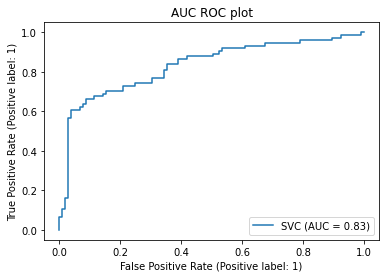

In [89]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_, x_test, y_test)
plt.title("AUC ROC plot")
plt.show()

## SAVING MODEL IN PICKLE FORMAT

In [91]:
# pickeling or serialization of a file
import pickle
filename = 'Titanic_Project.pkl'
pickle.dump(GCV.best_estimator_, open(filename, 'wb'))

## PREDICTED DATASET

In [94]:
import numpy as np
a=np.array(y_test)
predicted=np.array(GCV.best_estimator_.predict(x_test))
df_comparison = pd.DataFrame({"original":a,"predicted":predicted},index= range(len(a)))
df_comparison

,original,predicted
0,1,1
1,0,0
2,0,0
3,1,1
4,1,0
...,...,...
174,0,0
175,1,1
176,0,0
177,1,1


In [95]:
#saving this final predicted orignal comparision dataset 
df_comparison.to_csv('Titanic_survival_prediction.csv')